In [15]:
%load_ext autoreload
%autoreload 2
    
from manager import * 
import rosnode
import time
from env_utils.algo_constants import *


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
if '/manager' in rosnode.get_node_names():
    # print("Manager is running")
    rosnode.kill_nodes(['manager'])
    time.sleep(1)

m = Manager(skip_checks=True, 
            debug_flag=True, 
            fake_hardware_flags=[FAKE_ARM, FAKE_PXRF, FAKE_MOVE_BASE],
            fake_pxrf_values= [0.4, 0.2, 0.3, 0, 0.02, 0.5, 0.32, 0.0, 0.6, 0.0, 0.1, 0.0])
# m.fake_pxrf_values = [0.13, 0.2, 0.0, 0.5, 0.6, 0.05]

[INFO] [1728544861.486963]:  < Status: Initialization > 
[INFO] [1728544861.564095]:  < Status: Ready > 
[INFO] [1728544861.569467]:  | Algorithm Set to ADAPTIVE with number of samples = 16
[INFO] [1728544861.570927]:  ----------- READY ----------- 


[WARN] [1728544861.566390]: >>> USING FAKE HARDWARE <<<<
[WARN] [1728544861.567946]: Fake Hardware Flags: ['fake_arm', 'fake_pxrf', 'fake_move_base']
[WARN] [1728544930.946278]: | Reset 


[INFO] [1728544931.018218]: ----------------
 Boundary Points:
 [(40.472192252948844, -79.96618878366543), (40.472287089637994, -79.96611691825605), (40.47232471460376, -79.96621370229717), (40.47222688966315, -79.96628646854616), (40.472192252948844, -79.96618878366543)]
----------------
[INFO] [1728544931.020545]: Boundary type: 0 (gps)
[INFO] [1728544932.408860]: Width: 15 m | 60 cells
[INFO] [1728544932.410567]: Height: 15 m | : 60 cells
[INFO] [1728544932.411933]: Start: (8.325877341558225, 0.0) m | (32, 0) cells
[INFO] [1728544932.413578]: Boundary Offset (MAP): [[8.325877341558225, 0.0], [14.294671454816125, 10.598438502289355], [6.0412823701044545, 14.678791693411767], [0.0, 3.747763028368354], [8.325877341558225, 0.0]]
[INFO] [1728544932.414746]: Boundary Offset (GRID): [(32, 0), (56, 41), (23, 57), (0, 13), (32, 0)]
len(x1): 60, len(x2): 60, len(x1x2): (3600, 2)
[INFO] [1728544932.504741]: -----------------
 Grid Points of length = 16:
 Lat: [40.472193131327636, 40.4721926038

[INFO] [1728544952.607183]: ----------- Manager Loop: adaptive -----------
[INFO] [1728544952.609639]: PXRF Mean Value: 0.3
[INFO] [1728544952.612428]:  < Status: Arm returned > 
[INFO] [1728544952.615205]: ----------- Manager Loop END -----------
[INFO] [1728544952.620384]: ----------- Manager Loop: adaptive -----------
[INFO] [1728544952.622559]:  < Status: Running search algo > 
[INFO] [1728544952.773061]:  | Updating GPR with value=0.3 at (GPS|Map|Grid): (40.472192252948844, -79.96618878366543) | (8.325877341558225, 0.0) | (32, 0) 


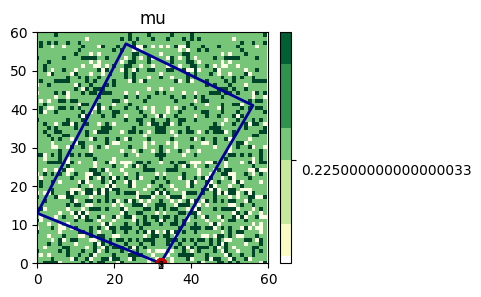

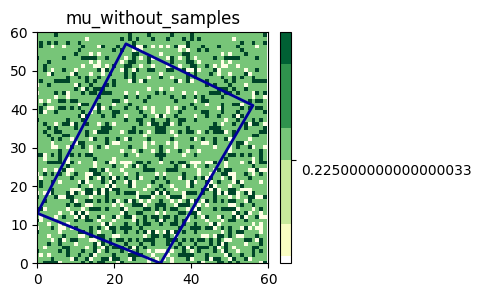

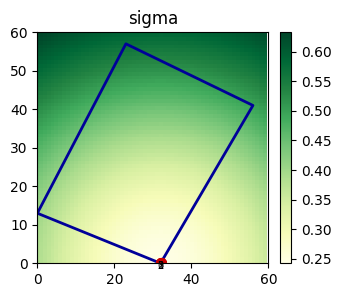

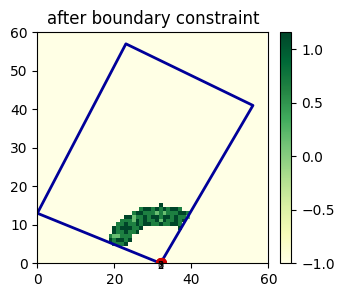

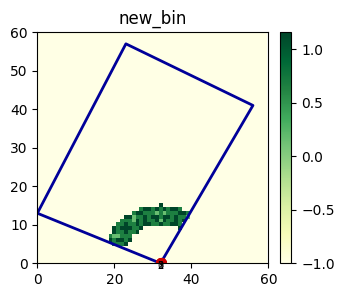

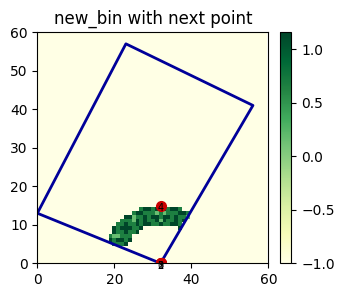

---------
[INFO] [1728544953.944365]:  | Sending Adaptive Algorithm Location (GPS|Map|Grid): (40.472227178576055, -79.96619061764893) | (np.float64(8.125), np.float64(3.875)) | [np.int64(32), np.int64(15)] 
[INFO] [1728544953.953497]:  < Status: Received next scan loc > 
[INFO] [1728544953.954481]: ----------- Manager Loop END -----------
[INFO] [1728544953.955777]: ----------- Manager Loop: adaptive -----------
[INFO] [1728544953.956707]:  < Status: Navigating to scan loc > 
[INFO] [1728544953.957664]:  < Status: Arrived at scan loc > 
[INFO] [1728544953.958475]: ----------- Manager Loop END -----------
GPR Kernel: RBF(length_scale=100)
Arrived at scan loc


[WARN] [1728544953.951752]: Sending location to GUI failed


In [12]:
if (m.status != SCANNING and
    m.status != ERROR):
    while ( m.status == ARRIVED_AT_SCAN_LOC or
            m.status == ARM_RETURNED):
            m.run_once()
    m.run_once()
    print(f'GPR Kernel: {m.adaptiveROS.gp.kernel_}')

print(m.status)

In [5]:
m.run_once()

[INFO] [1728544487.011453]: ----------- Manager Loop: algo_none -----------
[INFO] [1728544487.012801]: ----------- Manager Loop END -----------


In [ ]:
for i in range(0,4):
    if (m.status != SCANNING and
        m.status != ERROR):
        while ( m.status == ARRIVED_AT_SCAN_LOC or
                m.status == ARM_RETURNED):
                m.run_once()
        m.run_once()

In [14]:
m.adaptiveROS.

array([[-6.08511063],
       [ 4.73286383],
       [-0.6761234 ],
       [ 2.02837021]])

In [ ]:
m.show()

In [ ]:
m.adaptiveROS.predict(True)

In [ ]:
sampled = [[m.adaptiveROS.sampled[0][1], m.adaptiveROS.sampled[0][0]]]
# sampled = m.adaptiveROS.sampled
print(sampled)
m.adaptiveROS.gp.fit(sampled, 
                     m.adaptiveROS.sampled_val) #todo: Should we re-init self.gp?

nextScanLoc = m.adaptiveROS.predict(True)

In [ ]:
nav_goal_map = m.conversion.grid2map(nextScanLoc[0], nextScanLoc[1])
nav_goal_gps = m.conversion.map2gps(nav_goal_map[0], nav_goal_map[1])
        
m.send_location_to_GUI(nav_goal_gps[0], nav_goal_gps[1])

In [ ]:
print("NREC 13 Sep")
print(m.adaptiveROS.sampled)
print(m.adaptiveROS.sampled_val)
print(m.adaptiveROS.gp.kernel_)
print(m.init_pos_gps)
print(m.init_pos_grid)
print(m.init_pos_map)
print(m.algorithm_type)
print(m.algorithm_total_samples)
print(m.pxrf_mean_value)

In [ ]:
m.show()

In [ ]:
for i in range(0,20):
    if (m.status != SCANNING and
        m.status != ERROR):
        m.run_once()
        input()

In [ ]:
for i in range(0,20):
    if (m.status != SCANNING and
        m.status != ERROR):
        m.run_once()
        input()

In [ ]:
m.show()